## Static Classification

In [1]:
import pandas as pd
import soundfile
import os, glob, pickle
import numpy as np
import librosa

# df = pd.read_csv('annotations/dynamic_annotations.csv')
# d1 = df[df['musicId']==1] #untuk nyari yg music idnya 1
# x = d1['Arousal(mean)']
# y = d1['Valence(mean)']
# x

In [53]:
df = pd.read_csv('annotations/static_annotations.csv')
d4 = df[df['musicId']==4] #untuk nyari yg music idnya 1
x = d4['Arousal(mean)']
y = d4['Valence(mean)']
df4 = pd.DataFrame(x,columns=['Arousal(mean)'])
df4['Valence(mean)'] = y
df4

,Arousal(mean),Valence(mean)
1,0.2625,0.2875


In [54]:
data = df
data

,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250
...,...,...,...
762,993,0.8625,0.7625
763,996,0.8750,0.5625
764,997,0.7125,0.6625
765,999,0.8750,0.7750


In [60]:
len(musicId)

767

#### Scatter Plot Graph 

<AxesSubplot:xlabel='Arousal(mean)', ylabel='Valence(mean)'>

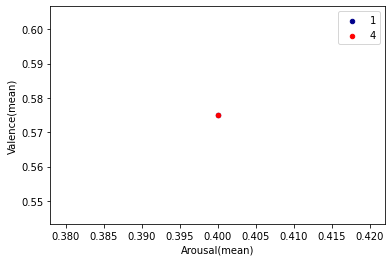

In [16]:
ax1 = df1.plot.scatter(x='Arousal(mean)',
                       y='Valence(mean)',
                       c='DarkBlue',label='1')
df4.plot.scatter(x='Arousal(mean)',
                       y='Valence(mean)',
                       c='Red',label='4',ax=ax1)

## Boxplot

<AxesSubplot:>

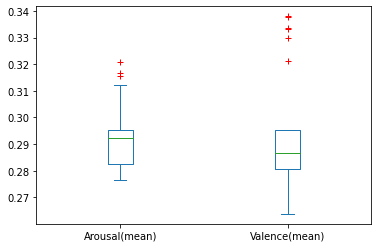

In [127]:
df4.plot.box(sym="r+")

#### Standard Deviation

In [ ]:
# da_std = pd.read_csv('annotations/static_annotations_std.csv')
# da_std[da_std['musicId']==4] #untuk nyari yg music idnya 1

## Feature Extraction

In [19]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [38]:
x =[]
x_f = []
for file in glob.glob("C:\\Users\\Visual\\example-librosa\\PMEmo_dataset\\PMEmo2019\\vocal_byria\\mono3\\*_vocals_mono_right.wav"):
    coba = []
    file_name=os.path.basename(file)
    musicIdAvailable = file_name.partition("_")
    musicIdAvailable = np.int_(musicIdAvailable[0])
    x.append(musicIdAvailable)
    features=extract_feature(file, mfcc=True, chroma=True, mel=False)
    coba = np.hstack((musicIdAvailable,features))
    x_f.append(coba)
#     print('x:',x)
#     print(np.int_(musicIdAvailable[0]))
# x = np.array(x)
# print('x_all:',x)
# print(len(x))
print(len(x_f))

263


In [39]:
x_f = np.array(x_f)
print(x_f)

[[ 1.00000000e+02 -6.04814331e+02  1.50115633e+01 ...  4.47422355e-01
   4.51079398e-01  4.33787674e-01]
 [ 1.01000000e+02 -2.66478302e+02  1.08317749e+02 ...  5.62010288e-01
   5.61035872e-01  6.20425701e-01]
 [ 1.02000000e+02 -2.62554779e+02  1.29649185e+02 ...  6.10282123e-01
   5.65521181e-01  5.31405151e-01]
 ...
 [ 9.80000000e+01 -2.43405991e+02  1.13038795e+02 ...  4.20543641e-01
   4.83193159e-01  4.31556225e-01]
 [ 9.90000000e+01 -2.98732727e+02  8.37934189e+01 ...  3.40502024e-01
   4.86738086e-01  4.40505981e-01]
 [ 9.00000000e+00 -2.05341064e+02  1.10362740e+02 ...  4.96317506e-01
   5.30767441e-01  5.25640965e-01]]


In [46]:
df2 = pd.DataFrame(x_f)
df2

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,100.0,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.454718,0.462188,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788
1,101.0,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.510496,0.539478,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426
2,102.0,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.483176,0.502287,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405
3,103.0,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.615861,0.536375,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225
4,104.0,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.346992,0.358700,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,96.0,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.396114,0.455821,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907
259,97.0,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.482299,0.411045,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724
260,98.0,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.401316,0.491995,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556
261,99.0,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.320873,0.347680,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506


In [50]:
df2[0] = np.int_(df2[0])
df2

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,100,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.454718,0.462188,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788
1,101,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.510496,0.539478,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426
2,102,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.483176,0.502287,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405
3,103,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.615861,0.536375,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225
4,104,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.346992,0.358700,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,96,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.396114,0.455821,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907
259,97,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.482299,0.411045,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724
260,98,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.401316,0.491995,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556
261,99,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.320873,0.347680,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506


In [52]:
df2.rename(columns={0:'musicId'},
          inplace=True)
df2

,musicId,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,100,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.454718,0.462188,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788
1,101,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.510496,0.539478,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426
2,102,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.483176,0.502287,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405
3,103,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.615861,0.536375,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225
4,104,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.346992,0.358700,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,96,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.396114,0.455821,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907
259,97,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.482299,0.411045,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724
260,98,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.401316,0.491995,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556
261,99,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.320873,0.347680,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506


### Label dari anotasi

In [55]:
data

,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250
...,...,...,...
762,993,0.8625,0.7625
763,996,0.8750,0.5625
764,997,0.7125,0.6625
765,999,0.8750,0.7750


In [56]:
df2

,musicId,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,100,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.454718,0.462188,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788
1,101,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.510496,0.539478,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426
2,102,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.483176,0.502287,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405
3,103,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.615861,0.536375,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225
4,104,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.346992,0.358700,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,96,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.396114,0.455821,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907
259,97,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.482299,0.411045,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724
260,98,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.401316,0.491995,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556
261,99,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.320873,0.347680,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506


In [61]:
# Merge audio features with annotations label
df3 = df2.merge(data, how='left', on='musicId')
df3

,musicId,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,Arousal(mean),Valence(mean)
0,100,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788,0.1750,0.3000
1,101,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426,NaN,NaN
2,102,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405,0.7375,0.8250
3,103,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225,0.5875,0.7750
4,104,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890,0.8375,0.8250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,96,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907,0.8750,0.8250
259,97,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724,0.8500,0.7500
260,98,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556,0.7375,0.6500
261,99,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506,0.6875,0.6875


In [70]:
# Select NaN data
df3[df3['Arousal(mean)'].isnull()]

,musicId,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,Arousal(mean),Valence(mean)
1,101,-266.478302,108.317749,-78.309174,24.957882,-40.810623,4.728434,-45.456009,-21.126780,17.619324,...,0.503386,0.466586,0.506117,0.529693,0.602750,0.562010,0.561036,0.620426,NaN,NaN
11,110,-303.677948,117.158600,-51.842442,-46.875721,-44.337940,2.642070,-41.519833,-32.748455,-10.170627,...,0.348862,0.397581,0.547479,0.640501,0.399709,0.250776,0.294375,0.398793,NaN,NaN
17,118,-201.629349,108.496422,-97.227684,4.315082,-45.368168,-8.498081,-29.309662,-45.982029,-11.240710,...,0.663608,0.684703,0.505425,0.510304,0.476888,0.557997,0.511553,0.536344,NaN,NaN
19,11,-289.589600,96.715088,-89.290688,48.145485,-33.138786,9.582134,-22.497242,-28.007061,10.986691,...,0.713915,0.587139,0.488911,0.537960,0.583515,0.735573,0.623347,0.565299,NaN,NaN
95,205,-281.900757,124.124382,-51.169765,2.324074,-46.168056,-3.502906,-17.482794,-22.361450,-3.560350,...,0.571337,0.377885,0.365157,0.364197,0.453182,0.405959,0.402012,0.482923,NaN,NaN
96,206,-363.107941,84.851288,-81.800705,-41.667725,-31.619602,-2.996641,-41.153282,12.510101,-1.757861,...,0.461540,0.286994,0.457953,0.290480,0.298743,0.187572,0.300653,0.628812,NaN,NaN
113,226,-316.399658,138.063843,-89.592247,-19.996735,-11.889512,13.698176,-28.698555,-29.600010,-22.685163,...,0.635697,0.472656,0.443094,0.518837,0.582132,0.752608,0.579831,0.465179,NaN,NaN
140,264,-371.599762,128.242813,-55.941067,2.623125,-15.275537,5.987063,-21.275188,-24.163939,3.695358,...,0.533651,0.519194,0.621333,0.574363,0.643003,0.564124,0.592794,0.555947,NaN,NaN
149,278,-266.199646,119.400955,-55.646664,44.104923,-15.568099,-12.479897,-17.490368,-23.173796,-9.823995,...,0.632132,0.533590,0.569223,0.577123,0.533541,0.514914,0.535114,0.607746,NaN,NaN
158,291,-200.747681,107.493881,-112.428139,-3.339326,-71.678467,-5.846184,-40.102570,-17.679361,-12.986806,...,0.513746,0.437208,0.367037,0.547878,0.530264,0.779724,0.602084,0.428724,NaN,NaN


In [72]:
df3 = df3.dropna()
df3 = df3.reset_index(drop=True)
df3

,musicId,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,Arousal(mean),Valence(mean)
0,100,-604.814331,15.011563,-15.880315,10.868472,8.456553,-6.770766,-1.570739,-0.533331,-6.258149,...,0.496148,0.398146,0.352995,0.347004,0.414619,0.447422,0.451079,0.433788,0.1750,0.3000
1,102,-262.554779,129.649185,-86.125961,25.147539,-5.096253,-19.793264,-7.049425,-25.917292,-12.541618,...,0.444727,0.424618,0.438532,0.630316,0.733546,0.610282,0.565521,0.531405,0.7375,0.8250
2,103,-179.218628,133.723495,-85.577881,4.912219,-49.131073,-17.678123,-50.727650,-21.806805,-0.741411,...,0.500879,0.437334,0.390049,0.511423,0.605090,0.683553,0.593009,0.582225,0.5875,0.7750
3,104,-449.621399,89.391136,-26.341406,-39.230961,-32.853256,-27.058338,-3.082660,13.602465,-3.106354,...,0.427305,0.482722,0.293630,0.308250,0.360354,0.261049,0.260268,0.294890,0.8375,0.8250
4,105,-287.831146,78.426025,-76.980957,-8.439248,-43.872879,-24.765245,-15.413498,-5.807484,5.686130,...,0.467663,0.511828,0.300665,0.298262,0.426480,0.380603,0.406032,0.435650,0.2750,0.3875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,96,-306.533600,125.093704,-55.221157,-39.578602,-32.275562,-9.367213,-27.075779,-33.108089,-15.302660,...,0.402781,0.464213,0.401585,0.512384,0.476195,0.422308,0.503859,0.382907,0.8750,0.8250
244,97,-297.712158,85.364647,-108.208458,-12.870231,-42.313229,-8.876866,-15.962928,-32.517788,-9.678928,...,0.405073,0.505428,0.484235,0.454512,0.431366,0.427582,0.508757,0.467724,0.8500,0.7500
245,98,-243.405991,113.038795,-105.890671,6.579345,-59.195568,-10.354745,-14.919545,-32.071930,-12.862536,...,0.501629,0.565248,0.429614,0.448391,0.521667,0.420544,0.483193,0.431556,0.7375,0.6500
246,99,-298.732727,83.793419,-66.578987,11.948513,-50.574249,-16.256660,-15.430223,-33.992752,-18.764923,...,0.297809,0.366306,0.415793,0.614375,0.430771,0.340502,0.486738,0.440506,0.6875,0.6875


### save raw data

In [73]:
df3.to_csv('raw_data.csv')

### oret-oret

In [2]:
d = []
a = []
a.append(1)
a.append(2)
a.append(3)
b = np.array([4,5,6])
a = np.array(a)
c = np.hstack((a,b))
e = np.hstack((b,a))
d.append(c)
d.append(e)
d = np.array(d)
print(d)

[[1 2 3 4 5 6]
 [4 5 6 1 2 3]]


In [36]:
a = np.array([])
a = np.hstack((a,1))
a

array([1.])

# Oret-oret

In [6]:
sf = pd.read_csv('../features/static_features.csv')
sf

,musicId,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,1,7.318236,0.716432,0.0,2.245124,3.145057,3.956726,0.899933,0.811669,1.711601,...,10.694290,0.552123,2.884782,2.886936,-1339.0630,0.554930,113.55350,57.37954,111.61330,59.35901
1,4,6.558082,0.703399,0.0,1.606873,2.116417,2.917487,0.509543,0.801071,1.310614,...,8.273178,0.535849,2.659783,2.660821,-2561.7130,0.665665,104.48770,63.52283,106.18320,54.71746
2,5,8.152512,0.368032,0.0,1.404577,1.969597,2.666271,0.565020,0.696674,1.261694,...,9.705502,0.598316,2.422745,2.421824,2630.3710,0.550189,105.54060,53.73272,105.51670,54.68540
3,6,8.527122,0.281728,0.0,2.106767,3.345879,4.250905,1.239112,0.905025,2.144137,...,7.689778,0.575360,2.224280,2.224137,15484.8700,0.580155,98.76061,49.21307,101.23990,49.36958
4,7,7.756963,0.958923,0.0,3.683783,4.581017,5.297434,0.897234,0.716417,1.613651,...,8.710414,0.560565,2.219199,2.227387,-271.0219,0.536837,96.05625,51.72694,95.41311,53.10697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,993,8.378412,0.680590,0.0,2.728126,3.845191,5.264757,1.117064,1.419566,2.536630,...,11.226420,0.559879,2.544755,2.546021,-2010.1450,0.622314,109.22900,59.13757,105.51910,58.49892
790,996,7.961765,0.923569,0.0,3.891528,5.317545,5.944809,1.426017,0.627264,2.053281,...,12.711770,0.639621,2.599786,2.598629,2247.9420,0.545877,113.89870,60.04008,114.09210,55.47742
791,997,8.305466,0.461791,0.0,2.562763,4.783508,5.864176,2.220744,1.080668,3.301413,...,8.825824,0.554743,2.225728,2.223910,1224.7670,0.579119,104.00700,50.69448,101.76250,55.04704
792,999,8.302629,0.760462,0.0,4.225634,5.345556,6.034480,1.119922,0.688924,1.808846,...,7.450211,0.499976,2.244456,2.243278,1906.0100,0.580830,97.37801,48.68456,98.12227,48.16222
